In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
%pip install mlxtend

  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.24.0-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 1. Load the Dataset
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
# Explore and Understand the Data
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [86]:
df.shape

(100, 4)

In [87]:
# data preprocessing

df = df.iloc[: , 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


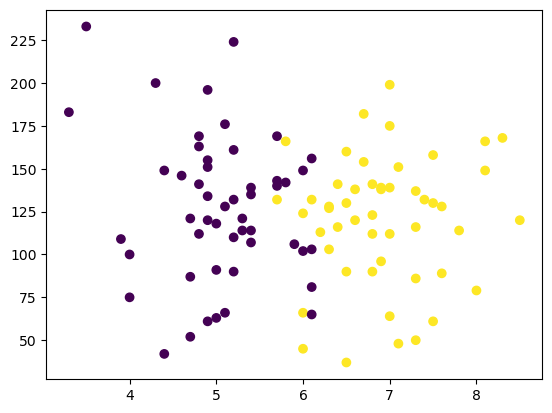

In [88]:
# EDA
plt.scatter(df['cgpa'] , df['iq'] , c=df['placement'])

In [89]:
# extract input and output columns
x = df.iloc[ : , 0:2]
y = df.iloc[ : , -1]
x.shape , y.shape

((100, 2), (100,))

In [90]:
# train test split
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test  = train_test_split( x , y , test_size=0.1) # test_size -> fraction of data to be used for testing 

In [91]:
y_train

40    0
12    0
10    1
71    1
56    0
     ..
98    1
41    0
79    1
54    1
0     1
Name: placement, Length: 90, dtype: int64

In [92]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train

array([[-0.91472477,  0.27503309],
       [-0.48683896,  0.39613376],
       [ 0.02662401, -1.8805589 ],
       [ 0.11220117,  0.22659282],
       [ 0.11220117, -1.39615621],
       [ 1.99489872,  1.09851766],
       [-0.23010748,  0.4930143 ],
       [ 1.13912711, -0.16092934],
       [-0.57241613, -0.03982867],
       [-0.82914761, -1.44459648],
       [ 0.11220117,  0.80787605],
       [-1.0858791 , -0.03982867],
       [ 0.28335549,  0.10549214],
       [-0.74357045, -1.37193607],
       [ 0.54008698, -0.0640488 ],
       [ 0.36893265, -0.16092934],
       [-0.74357045,  1.29227874],
       [ 0.62566414,  0.75943578],
       [-1.77049639, -0.33047028],
       [ 0.02662401,  0.03283174],
       [ 0.96797278, -1.8078985 ],
       [-2.11280503,  2.67282642],
       [ 1.31028143,  0.85631632],
       [-0.82914761, -0.11248907],
       [ 0.88239562,  1.84934184],
       [ 1.13912711,  0.34769349],
       [ 0.54008698,  0.37191362],
       [-1.34261058,  0.63833511],
       [-0.91472477,

In [93]:
x_test = scaler.transform(x_test)
x_test

array([[-0.23010748,  1.1227378 ],
       [ 0.88239562,  0.39613376],
       [-0.65799329,  0.22659282],
       [ 0.79681846,  0.39613376],
       [-0.05895316, -0.40313069],
       [ 1.31028143,  0.17815255],
       [-0.74357045,  0.12971228],
       [ 0.02662401,  0.63833511],
       [ 0.79681846, -0.64533203],
       [-0.23010748,  0.22659282]])

In [94]:
# train model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train , y_train)

LogisticRegression()

In [95]:
# evaluation of model
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [96]:
y_test

84    0
32    1
19    0
60    1
1     0
83    1
86    0
33    0
66    1
87    1
Name: placement, dtype: int64

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8

In [ ]:
import pickle 

In [ ]:
# save the model and add to the project folder
pickle.dump(clf , open('model.pkl' , 'wb'))